XII Summer School in Statistics and Operation Research, July 1-5, 2018.   
Universitat Politècnica de Catalunya, Barcelona, Spain.


# Tutorial (Day-2): Introduction to Brain Connectivity
### by Gorka Zamora-López, Ph.D.
Human Brain Project / Pompeu Fabra University

<img src="Images/HBPlogo_small.png" style="float:left; width:254px; heigth:50px " alt="HBP logo" />
<img src="Images/UPFlogo_small.png" style="float:right; width:149px; height:50px"  alt="UPF logo" />

<br/>
<br/>
<br/>
<br/>

---------------------------

#### Dependencies
<img src="Images/GAlib_Logo_Small.png" style="float:right; width:125px; height:70px"  alt="GAlib logo" />

This tutorial requires a Python 3.X installation together with NumPy and Matplotlib libraries. To analyse networks we will use the *Graph Analysis Library* (**GAlib**), developed by Gorka Zamora-López. Find the library and instructions in its [GitHub repository](https://github.com/gorkazl/pyGAlib). GAlib is registered in the Python Package Index (PyPI), therefore installation only requires to run the following command in a terminal 

    $ pip install galib


### Import the main libraries

To get started, the first thing we need is to load the libraries we will need to work. Note that here we will make an absolute import of *NumPy*.

In [1]:
from timeit import default_timer as timer
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import*

**Import GAlib**

The following cell will check whether GAlib is already installed in the current working environment, otherwise, it will call `pip` for the installation (a working internet connection is required). **NOTE**: The exclamation mark ( ! ) before ``pip install galib`` indicates to the Jupyter Notebook that the current line is a system command, which is then treated as if it were run from a terminal.

In [6]:
## Check if GAlib is installed in the current environment, otherwise install
try:
    import galib
except:
    print('Installing GAlib...')
    ! pip install galib
    import galib

<br>
<br>

## Structural Connectivity ––––––––––––––––––––––––––––––––––––––––––––
#### Load the data and explore basic features of the network

In this tutorial, we will study the anatomical long-range brain connectivity in the brain of cats. The data consist of a parcellation (division) of one brain hemisphere into **53 cortical regions** (grey matter), and the anatomical long-range fibers experimentally identified between them. Let's load the data and visualise the adjacency matrix.

In [7]:
dataroot = 'datasets/Cat/'
catnet = loadtxt(dataroot + 'Cat53_cortex.txt', dtype=float)

plt.figure()
plt.imshow(catnet, cmap='gray_r')
plt.colorbar()

Most graph measures exist for directed networks, which provides richer information. Check for example the `Reciprocity()` and `ReciprocalDegree()` functions. GAlib functions usually come with an optional parameter `directed` in order to specify whether the undirected or the directed version of the metric is desired. By default, the parameter is set to `directed=False`.

For the rest of the tutorial we will consider that the long-range connectome is **symmetric**, which is a fairly good approximation, and we will ignore the weights of the links.

In [8]:
# Symmetrise and binarise the adjacency matrix
netsym = 0.5 * (catnet + catnet.T)
netsym = where(netsym,1,0).astype(uint8)

plt.figure()
plt.imshow(netsym, cmap='gray_r')
plt.colorbar()

In [10]:
# Fundamental properties of the network
N = len(netsym)
L = 0.5 * netsym.astype(bool).sum()
Lmax = 0.5 * N*(N-1)
dens = L / Lmax

print('Number of nodes, N: %d\t\tNumber of links, L: %d\t\tdensity: %1.3f' %(N, L, dens))

Number of nodes, N: 53		Number of links, L: 523		density: 0.380


### (Exercise 1) – Local network properties
Let's start analysing the network. First, we will:
1. find its degree distribution, and
2. calculate the clustering coefficient

First of all, we need to import the functions from the Graph Analysis Library (GAlib). For now, we will use the module *galib.py*, which contains functions to estimate graph measures out of a graph.

Degrees: Min = 4, Max = 39, Mean degree: 19.736


Text(0.5, 0, 'Node degree')

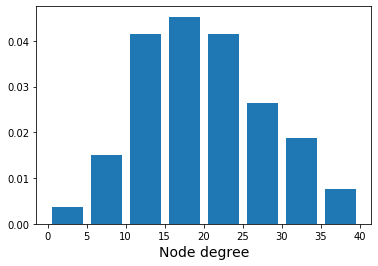

In [11]:
from galib import Degree, Clustering

# Calculate the degree of every node
deg = Degree(netsym, directed=False)
print('Degrees: Min = %d, Max = %d, Mean degree: %1.3f' %(deg.min(), deg.max(), deg.mean()))

# Plot the degree distribution
plt.figure()
plt.hist(deg, bins=8, range=(0,40), rwidth=0.8, density=True)
plt.xlabel('Node degree', fontsize=14)

In [12]:
# Calculate the clustering of the network and the local clustering of every node
C, Cnodes = Clustering(netsym, checkdirected=False)

print( 'Clustering coefficient: %1.3f' %C )
print( 'Local clustering: Min = %1.3f, Max = %1.3f, Average = %1.3f' %(Cnodes.min(), Cnodes.max(), Cnodes.mean()) )

Clustering coefficient: 0.585
Local clustering: Min = 0.399, Max = 1.000, Average = 0.668


### (Exercise 2) – Global network properties 

1. Compute the diameter of the network and its average pathlength
2. Calculate the betwenness centrality of the nodes

The [Dijkstra algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) is a famous method to find the graph distance between two nodes in a graph. However, if we want to know the distance between all pairs, the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd–Warshall_algorithm) is faster than running Dijkstra N^2 times. 

In [13]:
from galib import FloydWarshall
# Calculate the pair-wise graph distance matrix
Dij = FloydWarshall(netsym)

diam = Dij.max()
avpathlen = (Dij.sum() - Dij.trace()) / (N*(N-1))

print('Diameter: %d\tAv. Pathlen: %1.3f' %(diam, avpathlen))

Diameter: 3	Av. Pathlen: 1.653


In [14]:
# Calculate the pairwise distance matrix, the between centrality of every node,
# all shortest paths from node i to j, and all shortest path starting 
# from i and returning to i
from galib import PathsAllinOne
Dij, bcnodes, paths, cycles = PathsAllinOne(netsym)
print( '\nBetweenness centrality. Min: %d\tMax: %d' %(bcnodes.min(), bcnodes.max()) )


Betweenness centrality. Min: 0	Max: 781


In [16]:
# Normalise BC of the nodes by the number of existing shortest paths
# diameter was diam=3
npaths = len(paths[1]) + len(paths[2]) + len(paths[3])
bcnormed = bcnodes / npaths 

print( 'Total number of shortest paths: %d' %npaths )
print( 'Betweenness centrality. Min: %1.3f\tMax: %1.3f' %(bcnormed.min(), bcnormed.max()) )

Total number of shortest paths: 13938
Betweenness centrality. Min: 0.000	Max: 0.056


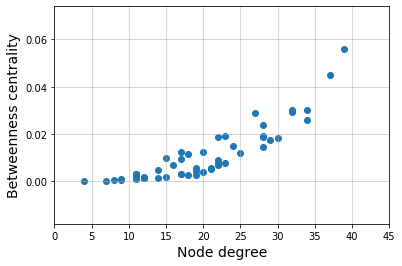

In [18]:
# Plot the relation between the degree and betweenness of each node
plt.figure()
plt.scatter(deg, bcnormed)
plt.xlabel('Node degree', fontsize=14)
plt.ylabel('Betweenness centrality', fontsize=14)
plt.xlim(0,45)
plt.grid(lw=0.5)

### (Exercise 3) – Graph models. Null-models and benchmarks

We will now compare the properties of the cat connectome to the properties of typical reference networks: *random graphs* and *degree-preserving random graphs*. These comparisons serve us to explore where the properties observed in real connectome may arise from.

**Random graphs** are the 1st-order reference network model. It is a well-known fact that the numerical outcome of all graph metrics strongly depends on how sparse, or how dense the network is (i.e., on the size N and number of links L.) This makes network comparison a difficult challenge. Random graphs are the network models with the least number of constraints (N and L) and only one assumption: that every link has been seeded independently, at random.

Beyond N and L, we often want to know how much do the observed metrics depend on a third constraint: the degree-distribution. Specially because the presence of hubs may strongly influence other properties. To explore that, we can generate reference graphs with the same N, L and degree-sequence as the original network, which are maximally random under those constraints. Because of the additional constraint, these are 2nd-order reference graphs. We can construct such networks by randomly rewiring the links of the original network, carefully conserving the given constraints.

In the GAlib library, the functions to generate different network models are located in the *galib.models.py* module.

In [ ]:
# Generate ensemble of random graphs with same N and L as the cat connectome
from gamodels import RandomGraph
nrealiz = 10
randnets = zeros((nrealiz,N,N), uint8)
for re in range(nrealiz):
    randnets[re] = RandomGraph(N,L, directed=False)

In [ ]:
# Generate ensemble of random graphs with same N and L and k-sequence as the cat connectome
from gamodels import RewireNetwork
rewnets = zeros((nrealiz,N,N), uint8)
for re in range(nrealiz):
    rewnets[re] = RewireNetwork(netsym, prewire=10, directed=False, weighted=False)

#### Compare the degree distributions

In [ ]:
deglist_rand = []
deglist_rew = []
for re in range(nrealiz):
    deglist_rand += Degree(randnets[re], directed=False).tolist()
    deglist_rew += Degree(rewnets[re], directed=False).tolist()
deglist_rand = array(deglist_rand, dtype=uint)
deglist_rew = array(deglist_rew, dtype=uint)

print('\nDEGREES')
print('Cat \t Min = %d, Max = %d,\t Mean degree: %1.3f' %(deg.min(), deg.max(), deg.mean()))
print('Random \t Min = %d, Max = %d,\t Mean degree: %1.3f' %(deglist_rand.min(), deglist_rand.max(), deglist_rand.mean()) )
print('Rew \t Min = %d, Max = %d,\t Mean degree: %1.3f' %(deglist_rew.min(), deglist_rew.max(), deglist_rew.mean()))

In [ ]:
# Plot the degree distributions
plt.figure()
plt.hist(deglist_rand, bins=8, range=(0,40), rwidth=0.8, density=True)
plt.xlabel('Node degree', fontsize=14)

plt.figure()
plt.hist(deglist_rew, bins=8, range=(0,40), rwidth=0.8, density=True)
plt.xlabel('Node degree', fontsize=14)

#### Compare the clustering coefficient

In [ ]:
Clist_rand = zeros(nrealiz, float)
Clist_rew = zeros(nrealiz, float)
for re in range(nrealiz):
    Crand, Cnodes_rand = Clustering(randnets[re])
    Clist_rand[re] = Crand
    Crew, Cnodes_rew = Clustering(rewnets[re])
    Clist_rew[re] = Crew

print('\nCLUSTERING COEFFICIENT')
print('Cat:\t%1.3f \nRandom:\t%1.3f \nRew:\t%1.3f' %(C, Crand, Crew))

#### Compare the pathlength and betweenness centrality

In [ ]:
# First, calculate pathlengths and BC from the RANDOM graphs
avlenlist_rand = zeros(nrealiz, float)
bclist_rand = []
triuidx = triu_indices(N, k=1)
for re in range(nrealiz):
    Dij_rand, BC_rand, paths, cycles = PathsAllinOne(randnets[re])
    values = Dij_rand[triuidx]
    avlenlist_rand[re] = values.mean()
    bclist_rand += BC_rand.tolist()

# Calculate pathlengths and BC from the REWIRED graphs
avlenlist_rew = zeros(nrealiz, float)
bclist_rew = []
for re in range(nrealiz):
    Dij_rew, BC_rew, paths, cycles = PathsAllinOne(rewnets[re])
    values = Dij_rew[triuidx]
    avlenlist_rew[re] = values.mean()
    bclist_rew += BC_rew.tolist()


In [ ]:
# Results for the average pathlength 
plt.figure()
plt.title('Comparison of average pathlengths', fontsize=14)
plt.bar( (1,2,3), (avpathlen, avlenlist_rand.mean(), avlenlist_rew.mean()) )
plt.ylim(1,2)
plt.xticks((1,2,3), ('Cat', 'Random', 'Rewired') )
plt.grid(axis='y', lw=0.5)


In [ ]:
# Results for the betweenness centrality
plt.figure()
plt.scatter(deg*deg, bcnodes)
plt.plot(deglist_rand**2, bclist_rand, '.', color='red', zorder=10)
plt.plot(deglist_rew**2, bclist_rew, '.', color='orange', zorder=5)
plt.xlabel('Node degree', fontsize=14)
plt.ylabel('Betweenness centrality', fontsize=14)
#plt.xlim(0,45)
plt.grid(lw=0.5)

# Try again with k**2. (comment'xlim' out). What happens?

## Functional Connectivity –––––––––––––––––––––––––––––––––––––––––––––––

Usually, functional connectivity is obtain from dynamic / statistic measures to estimate the "closeness" between the temporal activity of two brain regions. Here, we don't have fMRI or EEG data from the brain of cats so, just for illustration purposes, we will compute an estimate (a prediction) of the FC. This estimate, *Topological similarity*, represents a diffusion process in the network. See Bettinardi, Deco et al. (2017) "*[How structure sculpts function: Unveiling the contribution of anatomical connectivity to the brain's spontaneous correlation structure](http://aip.scitation.org/doi/10.1063/1.4980099)*" Chaos, 27, 047409.

In [ ]:
import scipy.linalg
def TopologicalSimilarity(adjmatrix, coupling):
    """Computes the expected cross-correlation matrix of a given network.

    This function estimates the expected correlations between its nodes that
    a dynamical process on the network tends to generate. The estimation assumes
    that the "influence" of one node over another distributes over all possible
    paths but that the influence decays along the paths. This decay is estimated
    as the communicability matrix. Pairwise correlation is assumed, according
    to the patterns of inputs two nodes tend to receive.
    See further details in our paper:
    "Bettinardi et al. Chaos 27:047409 (2017)"

    Parameters
    ----------
    adjmatrix : ndarray of rank-2
        The adjacency matrix of the network.
    coupling : real valued number
        The coupling strength of all connections.

    Returns
    -------
    corrmatrix : ndarray of rank-2, same size as adjmatrix.
        The correlation matrix of the expected functional connectivity.

    See Also
    --------
    ExponentialMapping : Expected cross-correlation matrix of a given network.
    CovarianceLinearGaussian : Covariance matrix of an Ornstein-Uhlenbeck process.
    """
    # 0) Security check on the dtype
    if adjmatrix.dtype not in ['float32','float64','float']:
        adjmatrix = adjmatrix.astype(float64)

    # 1) Compute the communicability matrix
    Cmatrix = scipy.linalg.expm(coupling*adjmatrix).T

    # 2) Compute the product between all columns (Cmatrix was transposed)
    #    and the normalization
    corrmatrix = inner(Cmatrix, Cmatrix)
    norms = scipy.linalg.norm(Cmatrix, axis=1)
    normmatrix = outer(norms, norms.T)

    corrmatrix = corrmatrix / normmatrix
    return corrmatrix


In [ ]:
# Coupling strength
g = 0.09 #0.0766
fcnet = TopologicalSimilarity(netsym, g)

plt.figure()
plt.imshow(fcnet, cmap='jet')
plt.clim(0,1)
plt.colorbar()

In [ ]:
from galib import Intensity
intens = Intensity(fcnet, directed=False)

# Compare SC degree and FC intensity
plt.figure()
plt.scatter(deg, intens)
plt.xlabel('Node degree (SC)', fontsize=14)
plt.ylabel('Node intensity (FC)', fontsize=14)
plt.grid(lw=0.5)

In [ ]:
# Compare the graph distance and the pair-wise correlations
distvalues = Dij[triuidx]
fcvalues = fcnet[triuidx]
plt.figure()
plt.plot(distvalues, fcvalues, '.')
plt.xlabel('Graph distance (SC)', fontsize=14)
plt.ylabel('Correlation (FC)', fontsize=14)